<a href="https://colab.research.google.com/github/Sylvain-chateau/colab-small_projects/blob/master/Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook features a model for classifying newswires using the Reuters datase. It is inspired by the book "Deep learning with Python" by Keras author François Chollet.

# 1. Loading & preparing the data

In [1]:
#Loading the Reuters dataset, which is already preprocessed:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#Note: the argument num_words=10000 means that we only keep the top 10000 occuring words in the training data.

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
#Explore the data
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Test entries: {}, labels: {}".format(len(test_data), len(test_labels)))

Training entries: 8982, labels: 8982
Test entries: 2246, labels: 2246


each example in train_data is a list of integer. Each label associated with an example is an integer between 0 and 45 (46 classes)

In [0]:
#Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 2. Building the network

Since there are 46 different classes, we will take a large enough number of hidden units (64) in order to not drop information from layers to layers.

In [6]:
#model definition
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) #relu activation to add non-linearity to the model
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Compiling the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

# 3. Training the model

In [0]:
#Creation of validation set from the training set:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
#Training:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 1s 123us/sample - loss: 0.0805 - acc: 0.9577 - val_loss: 1.4099 - val_acc: 0.7790
Epoch 2/5
7982/7982 [==============================] - 1s 121us/sample - loss: 0.0796 - acc: 0.9584 - val_loss: 1.5001 - val_acc: 0.7710
Epoch 3/5
7982/7982 [==============================] - 1s 123us/sample - loss: 0.0798 - acc: 0.9580 - val_loss: 1.4478 - val_acc: 0.7800
Epoch 4/5
7982/7982 [==============================] - 1s 124us/sample - loss: 0.0804 - acc: 0.9589 - val_loss: 1.4330 - val_acc: 0.7810
Epoch 5/5
7982/7982 [==============================] - 1s 120us/sample - loss: 0.0785 - acc: 0.9584 - val_loss: 1.4374 - val_acc: 0.7780


# 4. Training and Validation losses

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

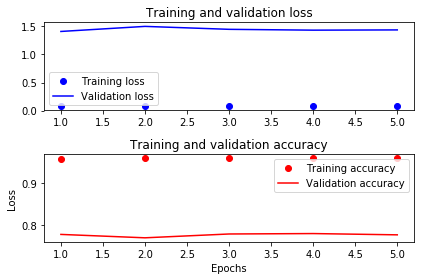

In [27]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
acc = history.history['acc']
validation_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.subplot(2, 1, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()